In [ ]:
# Install required libraries
!pip install kaggle
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from google.colab import files
files.upload()  # Upload the kaggle.json file here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aeplusjay","key":"aa8ac395d0f2cd243d46a040379de7ac"}'}

In [ ]:
import os
# Create a directory for the Kaggle configuration file
os.makedirs("/root/.kaggle", exist_ok=True)

# Move the uploaded kaggle.json file to the appropriate directory
!mv kaggle.json /root/.kaggle/


In [ ]:
# Install the Kaggle package
!pip install kaggle

# Download the CASIA 2.0 dataset (replace with the correct dataset name)
!kaggle datasets download -d divg07/casia-20-image-tampering-detection-dataset

# Unzip the dataset
!unzip casia-20-image-tampering-detection-dataset.zip -d /content/casia


Streaming output truncated to the last 5000 lines.
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_arc00045_arc00046_10084.tif  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_arc00045_arc00071_10087.tif  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_arc00046_arc00045_10083.tif  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_arc00054_cha00085_11922.jpg  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_arc00071_arc00045_10085.tif  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_arc00073_arc00072_10267.tif  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_arc00088_arc00064_10394.tif  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_art00012_art00013_11812.jpg  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_art00014_art00013_11836.jpg  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_art00058_art00049_10529.tif  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_art00067_ani00093_11801.jpg  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_art0006

In [ ]:
import os
import shutil
import random
from pathlib import Path

# Define paths
base_dir = '/content/casia'
au_dir = os.path.join(base_dir, 'Au')
tp_dir = os.path.join(base_dir, 'Tp')

# Create train and validation directories
for split in ['Train', 'Validation']:
    for label in ['Authentic', 'Tampered']:
        os.makedirs(os.path.join(base_dir, split, label), exist_ok=True)

# Helper function to split and move images
def split_and_move(src_dir, label_name):
    images = list(Path(src_dir).glob("*.jpg"))
    random.shuffle(images)
    split_idx = int(0.8 * len(images))

    train_imgs = images[:split_idx]
    valid_imgs = images[split_idx:]

    for img in train_imgs:
        shutil.copy(img, os.path.join(base_dir, 'Train', label_name, img.name))
    for img in valid_imgs:
        shutil.copy(img, os.path.join(base_dir, 'Validation', label_name, img.name))

# Move Au and Tp into Authentic and Tampered
split_and_move(au_dir, 'Authentic')
split_and_move(tp_dir, 'Tampered')


In [ ]:
from pathlib import Path

au_dir = '/content/casia/Au'
tp_dir = '/content/casia/Tp'

au_files = list(Path(au_dir).glob("*"))
tp_files = list(Path(tp_dir).glob("*"))

print(f"Authentic folder file count: {len(au_files)}")
print(f"Tampered folder file count: {len(tp_files)}")

print("\nSome file extensions in Au folder:")
print(set([f.suffix.lower() for f in au_files]))

print("\nSome file extensions in Tp folder:")
print(set([f.suffix.lower() for f in tp_files]))


Authentic folder file count: 0
Tampered folder file count: 0

Some file extensions in Au folder:
set()

Some file extensions in Tp folder:
set()


In [ ]:
from pathlib import Path

print("Files inside /content/casia/Au:")
print(list(Path('/content/casia/Au').glob("*"))[:5])

print("\nFiles inside /content/casia/Tp:")
print(list(Path('/content/casia/Tp').glob("*"))[:5])


Files inside /content/casia/Au:
[]

Files inside /content/casia/Tp:
[]


In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aeplusjay","key":"1017380ac183e8fa8360373818090624"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d divg07/casia-20-image-tampering-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/divg07/casia-20-image-tampering-detection-dataset
License(s): unknown
casia-20-image-tampering-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -o casia-20-image-tampering-detection-dataset.zip -d /content/casia


Streaming output truncated to the last 5000 lines.
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_arc00045_arc00046_10084.tif  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_arc00045_arc00071_10087.tif  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_arc00046_arc00045_10083.tif  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_arc00054_cha00085_11922.jpg  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_arc00071_arc00045_10085.tif  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_arc00073_arc00072_10267.tif  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_arc00088_arc00064_10394.tif  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_art00012_art00013_11812.jpg  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_art00014_art00013_11836.jpg  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_art00058_art00049_10529.tif  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_art00067_ani00093_11801.jpg  
  inflating: /content/casia/CASIA2/Tp/Tp_D_CRN_M_N_art0006

In [ ]:
from pathlib import Path

print("Authentic (Au) sample files:", list(Path("/content/casia/CASIA2/Au").glob("*"))[:3])
print("Tampered (Tp) sample files:", list(Path("/content/casia/CASIA2/Tp").glob("*"))[:3])


Authentic (Au) sample files: [PosixPath('/content/casia/CASIA2/Au/Au_cha_00028.jpg'), PosixPath('/content/casia/CASIA2/Au/Au_arc_30446.jpg'), PosixPath('/content/casia/CASIA2/Au/Au_nat_30295.jpg')]
Tampered (Tp) sample files: [PosixPath('/content/casia/CASIA2/Tp/Tp_D_NRN_S_N_ind00090_cha00063_00485.tif'), PosixPath('/content/casia/CASIA2/Tp/Tp_D_NRN_M_B_nat10155_nat10164_12115.jpg'), PosixPath('/content/casia/CASIA2/Tp/Tp_D_NRN_S_B_arc00094_ani00100_00314.tif')]


In [ ]:
!pip install -q pillow tqdm


In [ ]:
from PIL import Image
from tqdm import tqdm

tp_dir = '/content/casia/CASIA2/Tp'
converted_tp_dir = '/content/casia/CASIA2/Tp_converted'

os.makedirs(converted_tp_dir, exist_ok=True)

# Convert and copy all images
for img_path in tqdm(Path(tp_dir).glob("*")):
    if img_path.suffix.lower() == '.tif':
        try:
            img = Image.open(img_path).convert("RGB")
            img.save(os.path.join(converted_tp_dir, img_path.stem + ".jpg"), "JPEG")
        except Exception as e:
            print(f"Error converting {img_path}: {e}")
    elif img_path.suffix.lower() in ['.jpg', '.jpeg', '.png']:
        shutil.copy(img_path, converted_tp_dir)


5125it [00:15, 331.26it/s]


In [ ]:
import os
import shutil
import random
from pathlib import Path

# Set base directories
base_dir = '/content/casia'
au_dir = os.path.join(base_dir, 'CASIA2', 'Au')
tp_dir = os.path.join(base_dir, 'CASIA2', 'Tp_converted')

# Make split folders
for split in ['Train', 'Validation']:
    for label in ['Authentic', 'Tampered']:
        os.makedirs(os.path.join(base_dir, split, label), exist_ok=True)

def move_images(src_dir, label):
    files = [f for f in Path(src_dir).glob("*") if f.suffix.lower() in ['.jpg', '.jpeg', '.png']]
    random.shuffle(files)
    split = int(0.8 * len(files))
    train_files = files[:split]
    val_files = files[split:]

    for f in train_files:
        shutil.copy(f, os.path.join(base_dir, 'Train', label, f.name))
    for f in val_files:
        shutil.copy(f, os.path.join(base_dir, 'Validation', label, f.name))

# Move both classes
move_images(au_dir, 'Authentic')
move_images(tp_dir, 'Tampered')


In [ ]:
print("Train Authentic:", len(os.listdir('/content/casia/Train/Authentic')))
print("Train Tampered:", len(os.listdir('/content/casia/Train/Tampered')))
print("Validation Authentic:", len(os.listdir('/content/casia/Validation/Authentic')))
print("Validation Tampered:", len(os.listdir('/content/casia/Validation/Tampered')))


Train Authentic: 5949
Train Tampered: 4098
Validation Authentic: 1488
Validation Tampered: 1025


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time


In [ ]:
# Define transformations (data augmentation)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load datasets
train_dir = '/content/casia/Train'
valid_dir = '/content/casia/Validation'

train_data = datasets.ImageFolder(root=train_dir, transform=transform)
valid_data = datasets.ImageFolder(root=valid_dir, transform=transform)

# Create DataLoader for training and validation
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=False)


In [ ]:
# Load pre-trained MobileNetV3 model
model = torchvision.models.mobilenet_v3_large(pretrained=True)

# Modify the final fully connected layer to match our classes (Authentic, Tampered)
num_features = model.classifier[3].in_features
model.classifier[3] = nn.Linear(num_features, 2)  # 2 classes (Authentic and Tampered)

# Send model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 94.7MB/s]


In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


Epoch [1/10], Train Loss: 0.5464, Train Accuracy: 71.76%, Validation Loss: 0.4769, Validation Accuracy: 76.52%, Time: 1514.93s
Epoch [2/10], Train Loss: 0.3890, Train Accuracy: 81.90%, Validation Loss: 0.4613, Validation Accuracy: 79.23%, Time: 1569.80s
Epoch [3/10], Train Loss: 0.3311, Train Accuracy: 83.98%, Validation Loss: 0.4690, Validation Accuracy: 76.28%, Time: 1520.53s
Epoch [4/10], Train Loss: 0.2939, Train Accuracy: 85.93%, Validation Loss: 0.5211, Validation Accuracy: 77.08%, Time: 1507.73s
Epoch [5/10], Train Loss: 0.2692, Train Accuracy: 87.54%, Validation Loss: 0.4859, Validation Accuracy: 78.03%, Time: 1531.16s
Epoch [6/10], Train Loss: 0.2470, Train Accuracy: 88.35%, Validation Loss: 0.5220, Validation Accuracy: 78.83%, Time: 1512.14s
Epoch [7/10], Train Loss: 0.2281, Train Accuracy: 89.33%, Validation Loss: 0.5691, Validation Accuracy: 76.20%, Time: 1520.70s
Epoch [8/10], Train Loss: 0.2135, Train Accuracy: 90.27%, Validation Loss: 0.5450, Validation Accuracy: 78.07%,

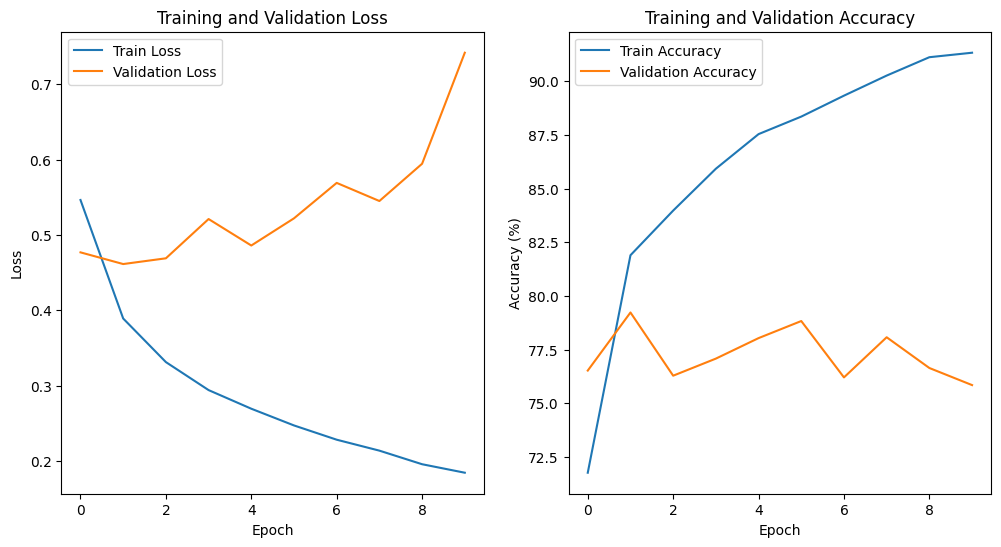

In [ ]:
# Number of epochs
epochs = 10

# Store training and validation loss/accuracy
train_loss, valid_loss = [], []
train_accuracy, valid_accuracy = [], []

# Training loop
for epoch in range(epochs):
    start_time = time.time()

    # Training phase
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate accuracy
    train_loss.append(running_loss / len(train_loader))
    train_accuracy.append(100 * correct / total)

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    valid_loss.append(val_loss / len(valid_loader))
    valid_accuracy.append(100 * correct / total)

    print(f'Epoch [{epoch + 1}/{epochs}], '
          f'Train Loss: {train_loss[-1]:.4f}, Train Accuracy: {train_accuracy[-1]:.2f}%, '
          f'Validation Loss: {valid_loss[-1]:.4f}, Validation Accuracy: {valid_accuracy[-1]:.2f}%, '
          f'Time: {time.time() - start_time:.2f}s')

# Plot the training and validation curves
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_loss, label='Train Loss')
plt.plot(range(epochs), valid_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracy, label='Train Accuracy')
plt.plot(range(epochs), valid_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


In [ ]:
# Final evaluation on the validation set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Final Validation Accuracy: {100 * correct / total:.2f}%')


Final Validation Accuracy: 75.85%


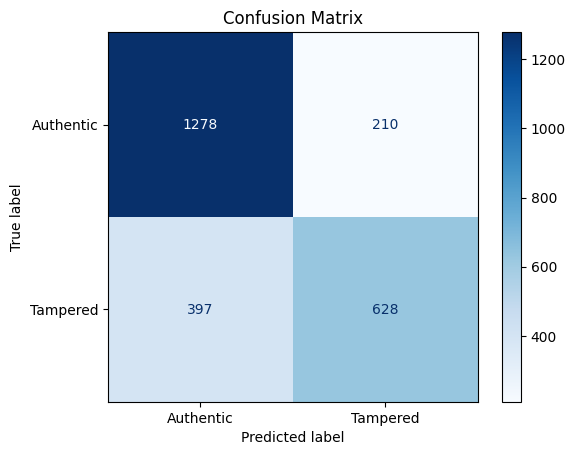

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get all predictions and labels
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

# Create confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_data.classes)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(all_labels, all_preds, target_names=train_data.classes)
print(report)


              precision    recall  f1-score   support

   Authentic       0.76      0.86      0.81      1488
    Tampered       0.75      0.61      0.67      1025

    accuracy                           0.76      2513
   macro avg       0.76      0.74      0.74      2513
weighted avg       0.76      0.76      0.75      2513



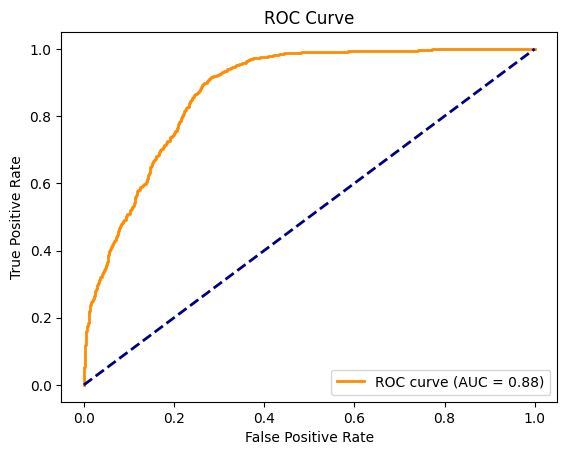

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels
binary_labels = label_binarize(all_labels, classes=[0, 1]).ravel()

# Get probabilities for the positive class
model.eval()
all_probs = []

with torch.no_grad():
    for inputs, _ in valid_loader:
        inputs = inputs.to(device)
        probs = torch.softmax(model(inputs), dim=1)[:, 1]
        all_probs.extend(probs.cpu().numpy())

# ROC Curve
fpr, tpr, _ = roc_curve(binary_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


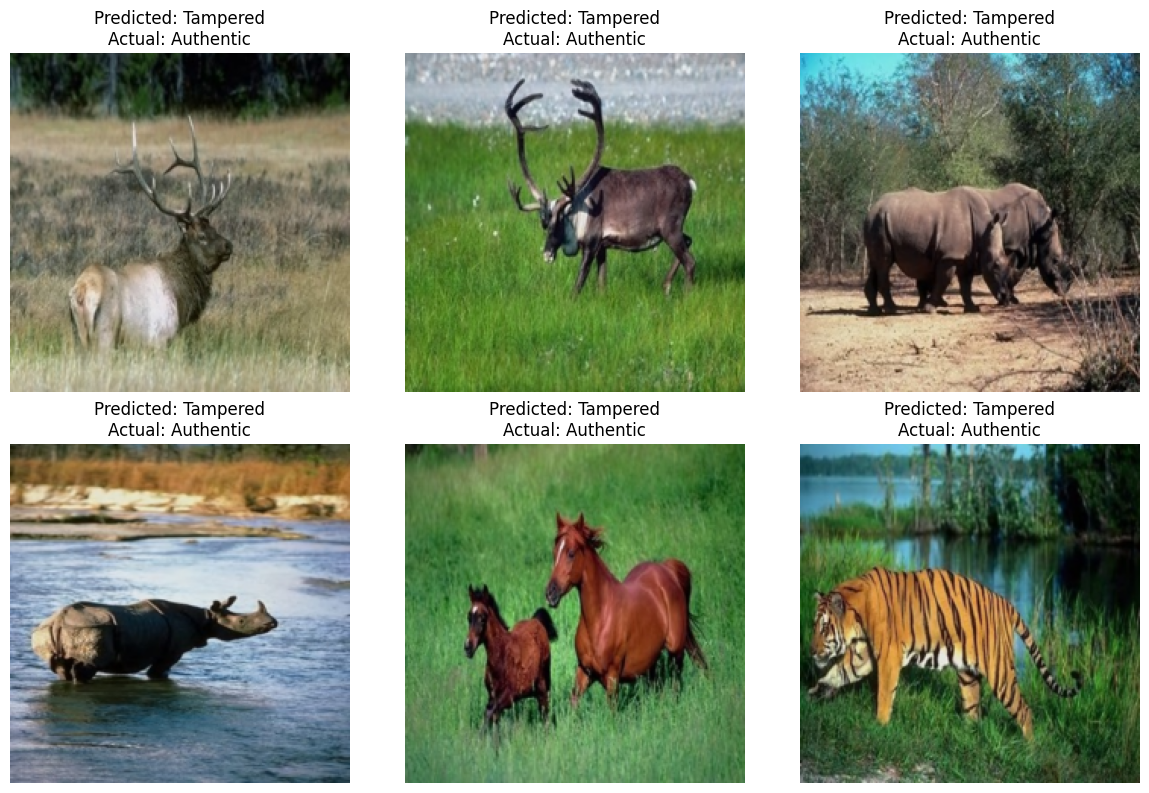

In [ ]:
import numpy as np

# Misclassified sample viewer
misclassified = []

model.eval()
with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        for i in range(len(preds)):
            if preds[i] != labels[i]:
                misclassified.append((inputs[i].cpu(), preds[i].cpu(), labels[i]))

# Show 6 misclassified images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, (img_tensor, pred, true) in enumerate(misclassified[:6]):
    img = img_tensor.permute(1, 2, 0).numpy()
    img = img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # unnormalize
    img = np.clip(img, 0, 1)

    ax = axes[i // 3, i % 3]
    ax.imshow(img)
    ax.set_title(f'Predicted: {train_data.classes[pred]}\nActual: {train_data.classes[true]}')
    ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
def visualize_feature_maps(model, image_tensor):
    model.eval()
    image_tensor = image_tensor.unsqueeze(0).to(device)

    # Hook to extract features from first conv layer
    features = []

    def hook_fn(module, input, output):
        features.append(output.cpu().data)

    handle = model.features[0].register_forward_hook(hook_fn)
    _ = model(image_tensor)
    handle.remove()

    fmap = features[0][0]  # First image, all channels

    # Plot first 12 feature maps
    plt.figure(figsize=(15, 10))
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(fmap[i], cmap='viridis')
        plt.axis('off')
    plt.suptitle('Feature Maps from First Conv Layer')
    plt.show()


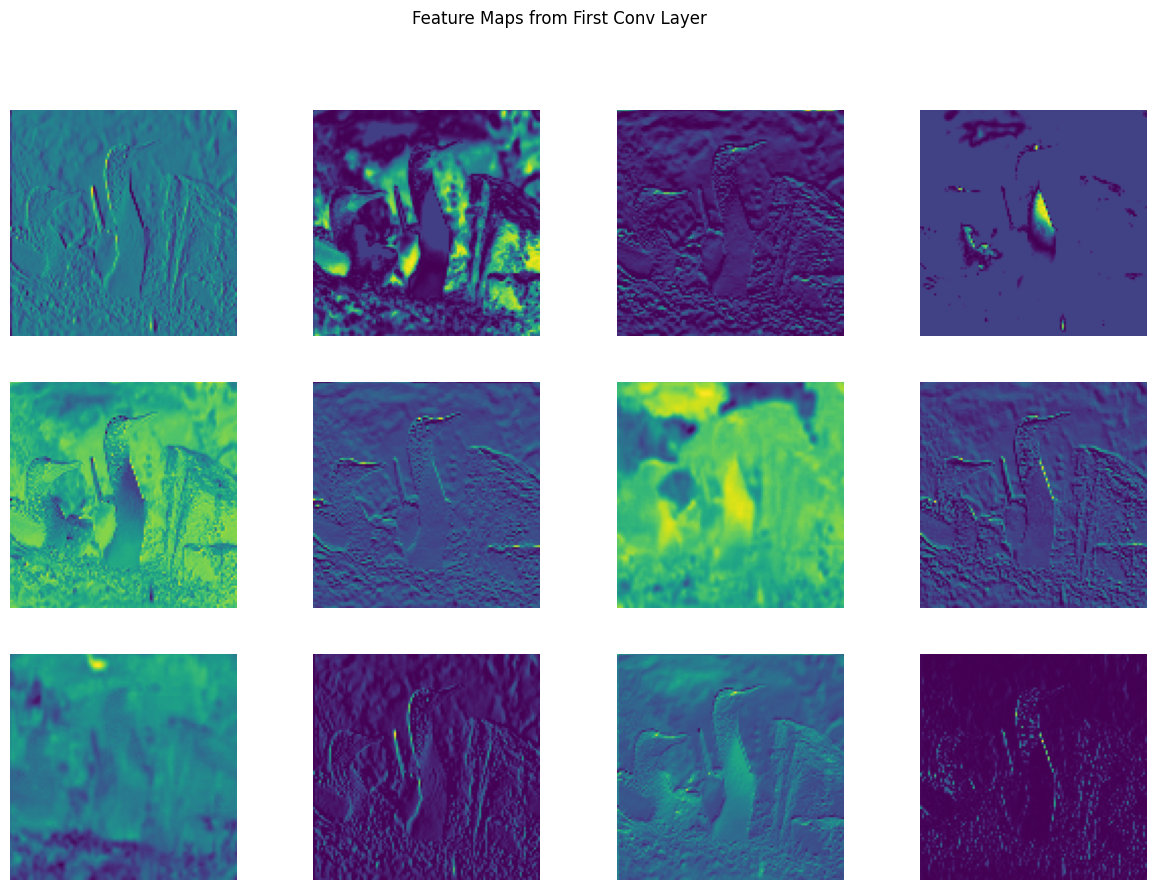

In [ ]:
sample_img, _ = valid_data[0]
visualize_feature_maps(model, sample_img)


In [ ]:
pip install torchcam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 46.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask
from torchvision.transforms.functional import to_pil_image
from PIL import Image
import matplotlib.pyplot as plt


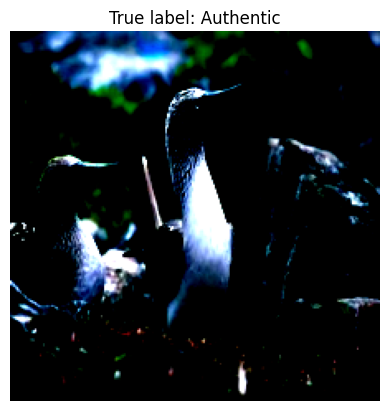

In [ ]:
# Get one image and label from validation set
sample_img, sample_label = valid_data[0]

# Show the image
plt.imshow(sample_img.permute(1, 2, 0))
plt.title(f"True label: {train_data.classes[sample_label]}")
plt.axis("off")
plt.show()


In [ ]:
# For MobileNetV3, the last conv layer is model.features[-1]
cam_extractor = GradCAM(model, target_layer="features.16")


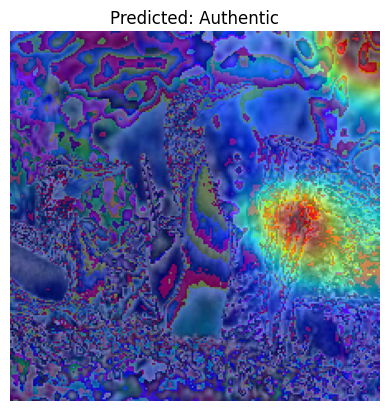

In [ ]:
# Forward pass
model.eval()
input_tensor = sample_img.unsqueeze(0).to(device)
output = model(input_tensor)
pred_class = output.squeeze(0).argmax().item()

# Extract CAM for predicted class
activation_map = cam_extractor(pred_class, output)

# Convert image back to PIL for overlay
rgb_img = to_pil_image(sample_img)

# Resize CAM to image size and overlay
result = overlay_mask(rgb_img, to_pil_image(activation_map[0], mode='F'), alpha=0.5)

# Show
plt.imshow(result)
plt.title(f"Predicted: {train_data.classes[pred_class]}")
plt.axis('off')
plt.show()


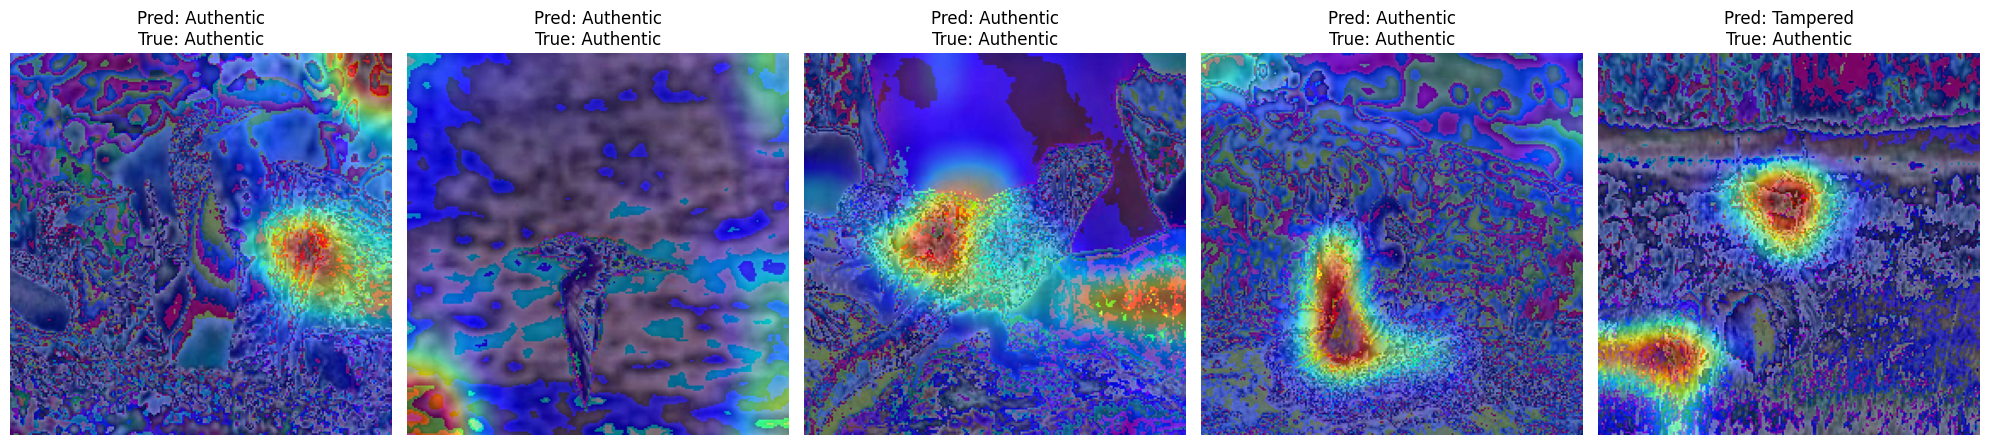

In [ ]:
import torch
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt
from PIL import Image

# Number of images to visualize
N = 5

# Set model to evaluation
model.eval()

# Grad-CAM extractor on last conv layer of MobileNetV3
cam_extractor = GradCAM(model, target_layer="features.16")  # Adjust this if needed

# Prepare figure
plt.figure(figsize=(N * 4, 6))

for i in range(N):
    # Get image and label
    img, label = valid_data[i]
    input_tensor = img.unsqueeze(0).to(device)

    # Forward pass
    output = model(input_tensor)
    pred_class = output.argmax(dim=1).item()

    # Extract activation map
    act_map = cam_extractor(pred_class, output)

    # Overlay GradCAM on image
    rgb_img = to_pil_image(img)
    cam_result = overlay_mask(rgb_img, to_pil_image(act_map[0], mode='F'), alpha=0.5)

    # Plot
    plt.subplot(1, N, i+1)
    plt.imshow(cam_result)
    plt.title(f"Pred: {train_data.classes[pred_class]}\nTrue: {train_data.classes[label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
